<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_%EC%A1%B0%EC%82%AC%EB%B9%84%EC%9A%A9_%EC%B5%9C%EC%86%8C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 104.7 MB/s eta 0:00:00


# linear programming 목적: 의사결정에 도움되는 것
## 1.변수정하기
## 2.목적함수정하기
## 3.제약식 정하기

1. A회사는 B당의 대선 후보 지지도를 조사하는데, 인구비례에 맞도록  
20-30대 350명, 40-50대 450명, 60-70대 200명의 응답을 얻어야한다.  
  
  전화와 이메일을 통해 조사하며, 전화는 한 통화당 200원, 인터넷은 50원의 비용이 든다.  
  전화를 이용할 경우 응답률은 80%, 인터넷은 25%로 추정되며, 접촉수단에 따른 인구 구성비의 기대값은 다음 표와 같다.


---
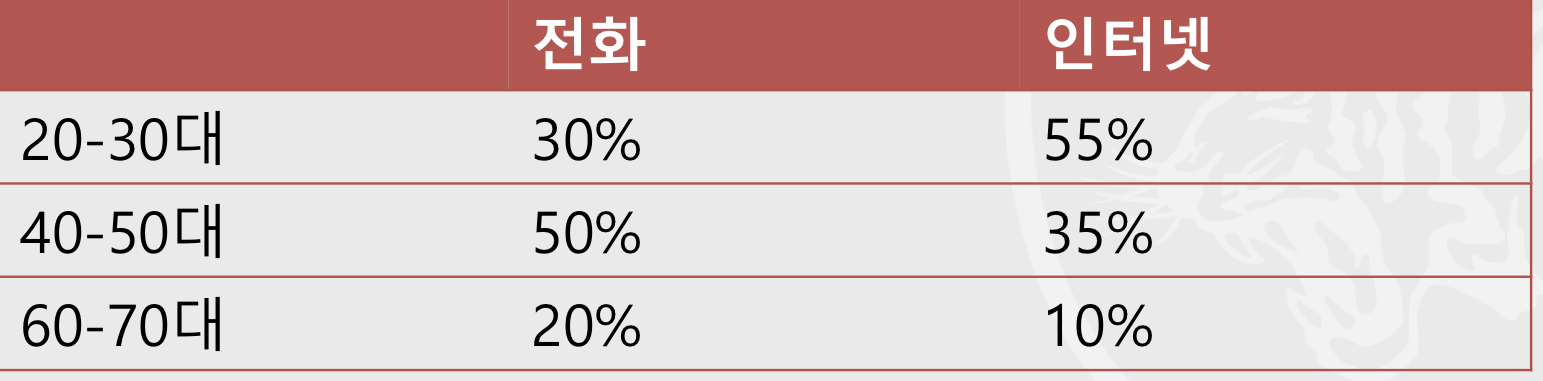


In [ ]:
from pulp import *

model = LpProblem(name="Practice#1", sense=LpMinimize)
# Define variables
variables = [LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 3)]

# Define constraints
constraints = []
constr_1_coeffs = [[0.8*0.3,0.25*0.55],[0.8*0.5, 0.25*0.35],[0.8*0.2, 0.25*0.1]]
for i in range(3):
    rhs_values = [350, 450, 200]
    constr_sup = LpConstraint(
        e=LpAffineExpression([(variables[j], constr_1_coeffs[i][j]) for j in range(2)]),
        sense=LpConstraintGE,
        rhs=rhs_values[i],
        name=f"constraint_sup{i + 1}"
    )
    constraints.append(constr_sup)

# Define objective function
obj_coefficients = [200, 50]
obj = LpAffineExpression([(variables[i],  obj_coefficients[i]) for i in range(2)])
model += obj

# Add variables, constraints, and objective function to the model
for constraint in constraints:
    model += constraint

# Print the LP model
print(model)
model.writeLP('out.txt')

# Solve the model
model.solve()

# Print the solution
for variable in variables:
    print(f"{variable.name}: {variable.value()}")

print(f"Optimal objective value: {model.objective.value()}")

Practice#1:
MINIMIZE
200*x1 + 50*x2 + 0
SUBJECT TO
constraint_sup1: 0.24 x1 + 0.1375 x2 >= 350

constraint_sup2: 0.4 x1 + 0.0875 x2 >= 450

constraint_sup3: 0.16 x1 + 0.025 x2 >= 200

VARIABLES
x1 Continuous
x2 Continuous

x1: 1171.875
x2: 500.0
Optimal objective value: 259375.0
